# Projeto de K Means Clustering  


Para este projeto, tentaremos usar o KMeans Clustering para agrupar Universidades em dois grupos: Privadas e Públicas.


___
É muito importante observar, nós realmente temos os rótulos para este conjunto de dados, mas NÃO os usaremos para o algoritmo de agrupamento KMeans, pois esse é um algoritmo de aprendizado não supervisionado.

Ao usar o algoritmo Kmeans em situações reais, você não possuirá rótulos. Nesse caso, usaremos os rótulos para tentar ter uma idéia do quão bem o algoritmo foi executado, apenas.
___

## Os dados

Usaremos um quadro de dados com 777 observações sobre as 18 variáveis a seguir.
* Private: Um fator com níveis Não e Sim, indicando universidade privada ou pública.
* Apps: Número de inscrições recebidas.
* Accept: Quantidade de inscrições aceitas.
* Enroll: Número de estudantes matriculados.
* Top10perc: Percentual de novos estudantes vindo do grupo de 10% melhores do segundo grau.
* Top25perc: Percentual de novos estudantes vindo do grupo de 25% melhores do segundo grau.
* F.Undergrad: Número de alunos de graduação em tempo integral.
* P.Undergrad Número de alunos de graduação em tempo parcial.
* Outstate: Aulas fora do estado.
* Room.Board: Custos da sala.
* Books: Custos de livros estimados.
* Personal: Estimativa de gastos por pessoa.
* PhD: Percentual de PHD's na universidade.
* Terminal: Percentual da faculdade com graduação.
* S.F.Ratio: Taxa estudantes/faculdade.
* perc.alumni: Percentual dos ex-alunos que doam.
* Expend: Despesas da instituição por aluno.
* Grad.Rate: Taxa de graduação

## Importar bibliotecas

**Importe as bibliotecas que você costuma usar para análise de dados.**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

## Obtenha os dados

**Leia no arquivo College_Data usando read_csv. Descubra como setar a primeira coluna como índice.**

In [3]:
dados = pd.read_csv('C:\\Users\\bruno\\Documents\\MachineLearning\\2025\\atividades\\K-Means\\College_Data', index_col=0)

**Verifique o cabeçalho dos dados**

In [4]:
dados.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**Verifique os métodos info() e describe() do DataFrame.**

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [6]:
dados.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## Análise exploratória de dados

É hora de criar algumas visualizações de dados.

**Crie um scatterplot de Grad.Rate versus Room.Board onde os pontos são coloridos pela coluna "Private".**

<Axes: xlabel='Room.Board', ylabel='Grad.Rate'>

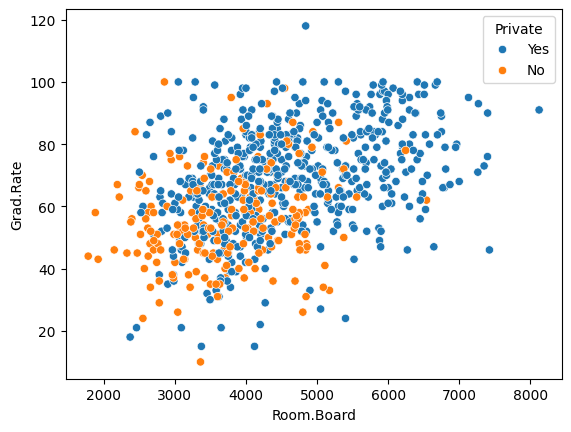

In [7]:
sns.scatterplot(x='Room.Board', y='Grad.Rate', data=dados, hue='Private')

In [8]:
publica = dados[dados['Private'] == 'No']
public_media_custo = publica['Room.Board'].mean()
publica_media_grad = publica['Grad.Rate'].mean()

print(f"Faculdades Públicas - Média do custo da sala: {public_media_custo:.2f}")
print(f"Faculdades Públicas - Média da taxa de graduação: {publica_media_grad:.2f}%")


Faculdades Públicas - Média do custo da sala: 3748.24
Faculdades Públicas - Média da taxa de graduação: 56.04%


In [9]:
privada = dados[dados['Private'] == 'Yes']
privada_media_custo = privada['Room.Board'].mean()
privada_media_grad = privada['Grad.Rate'].mean()

print(f"Faculdades Privadas - Média do custo da sala: {privada_media_custo:.2f}")
print(f"Faculdades Privadas - Média da taxa de graduação: {privada_media_grad:.2f}%")


Faculdades Privadas - Média do custo da sala: 4586.14
Faculdades Privadas - Média da taxa de graduação: 69.00%


In [10]:

correlacao, p_valor = pearsonr(dados['Room.Board'], dados['Grad.Rate'])
print(f"Correlação de Pearson: {correlacao:.4f}, Valor-p: {p_valor:.4f}")

Correlação de Pearson: 0.4249, Valor-p: 0.0000


In [11]:
X = dados[['Room.Board']] 
y = dados['Grad.Rate']    

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_
print(f"Linear equation: Grad_Rate = {slope:.2f} * Room_Board + {intercept:.2f}")

r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.2f}")

Linear equation: Grad_Rate = 0.01 * Room_Board + 36.46
R-squared: 0.18


Ou seja, para cada aumento na unidade de custo, a taxa de graduação aumenta em $0.01\%$. Já quando o custo do quarto é zero, a taxa de graduação $36.46\%$.

**Crie um scatterplot de F.Undergrad versus Outstate onde os pontos são coloridos pela coluna Private.**

<Axes: xlabel='F.Undergrad', ylabel='Outstate'>

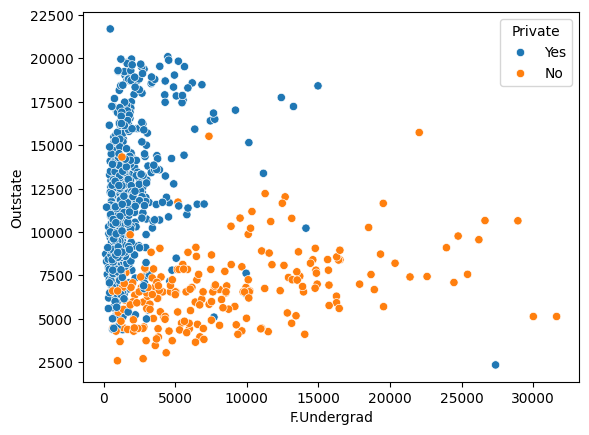

In [12]:
sns.scatterplot(x='F.Undergrad', y='Outstate', data=dados, hue='Private')

**Crie um histograma empilhado que mostra o "Out of State Tuition" com base na coluna Private. Tente fazer isso usando [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html). Se isso for muito complicado, veja se você pode fazê-lo apenas usando duas instâncias de pandas.plot(kind='hist').**

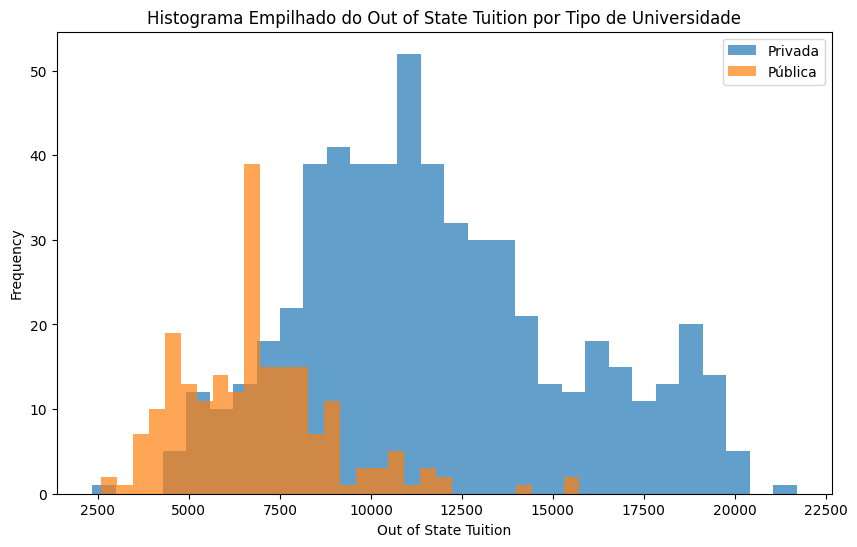

In [13]:
plt.figure(figsize=(10,6))
dados[dados['Private'] == 'Yes']['Outstate'].plot(kind='hist', bins=30, alpha=0.7, label='Privada')
dados[dados['Private'] == 'No']['Outstate'].plot(kind='hist', bins=30, alpha=0.7, label='Pública')
plt.legend()
plt.xlabel('Out of State Tuition')
plt.title('Histograma Empilhado do Out of State Tuition por Tipo de Universidade')
plt.show()

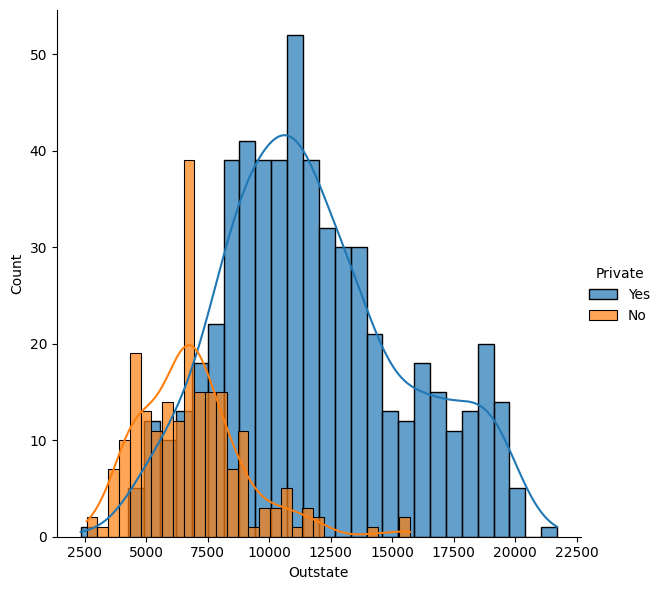

In [37]:
sns.FacetGrid(dados, hue='Private', height=6).map(sns.histplot, 'Outstate', bins=30, alpha=0.7, kde=True).add_legend()

**Crie um histograma semelhante para a coluna Grad.Rate.**

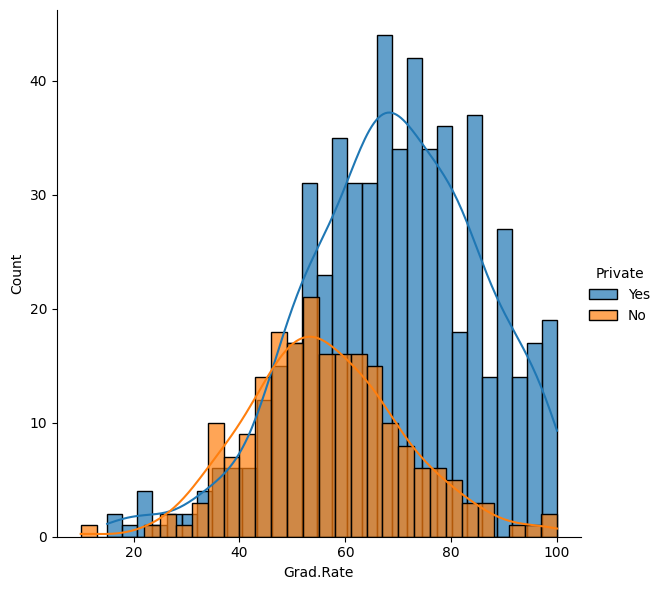

In [38]:
sns.FacetGrid(dados, hue='Private', height=6).map(sns.histplot, 'Grad.Rate', bins=30, alpha=0.7, kde=True).add_legend()

**Observe que parece haver uma escola particular com uma taxa de graduação superior a 100%. Qual é o nome dessa escola?**

In [16]:
anomalia = dados[(dados['Grad.Rate'] > 100) & (dados['Private'] == 'Yes')]
anomalia.index.tolist()

['Cazenovia College']

**Defina a taxa de graduação dessa escola para 100 para que isso faça sentido. Você pode obter um aviso (e não um erro) ao fazer esta operação basta usar operações de dataframe ou simplesmente re-fazer a visualização do histograma para garantir que ela realmente foi alterado.**

In [17]:
dados.loc[anomalia.index, 'Grad.Rate'] = 100

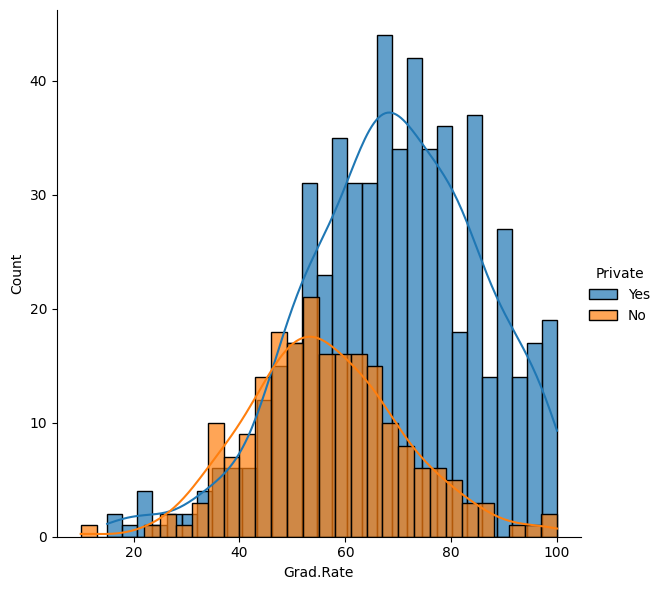

In [39]:
sns.FacetGrid(dados, hue='Private', height=6).map(sns.histplot, 'Grad.Rate', bins=30, alpha=0.7, kde=True).add_legend()

## Criação de clusters "K Means"

Agora é hora de criar os rótulos de Cluster!

**Importe KMeans da SciKit Learn.**

In [19]:
from sklearn.cluster import KMeans

**Crie uma instância do modelo K Means com 2 clusters.**

In [20]:
kmeans = KMeans(n_clusters=2)

**Fite o modelo para todos os dados, exceto para o rótulo privado.**

In [21]:
kmeans.fit(dados.drop('Private', axis=1))

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [22]:
centroids = kmeans.cluster_centers_
print("Centroids:\n", centroids)

Centroids:
 [[1.94782101e+03 1.31368639e+03 4.86974852e+02 2.67500000e+01
  5.45857988e+01 2.11855178e+03 5.43665680e+02 1.07181509e+04
  4.37916420e+03 5.44346154e+02 1.26384320e+03 7.10266272e+01
  7.82988166e+01 1.37792899e+01 2.37071006e+01 9.61601627e+03
  6.59896450e+01]
 [1.00549109e+04 6.73820792e+03 2.74102970e+03 3.29702970e+01
  6.39009901e+01 1.42840297e+04 2.94107921e+03 8.58346535e+03
  4.21270297e+03 5.83079208e+02 1.85466337e+03 8.35940594e+01
  8.90990099e+01 1.61673267e+01 1.62970297e+01 9.95570297e+03
  6.17623762e+01]]


**Quais são os vetores centrais do cluster?**

In [23]:
vetores_centrais = kmeans.cluster_centers_
rotulos = kmeans.labels_
print(vetores_centrais)
print(rotulos)

[[1.94782101e+03 1.31368639e+03 4.86974852e+02 2.67500000e+01
  5.45857988e+01 2.11855178e+03 5.43665680e+02 1.07181509e+04
  4.37916420e+03 5.44346154e+02 1.26384320e+03 7.10266272e+01
  7.82988166e+01 1.37792899e+01 2.37071006e+01 9.61601627e+03
  6.59896450e+01]
 [1.00549109e+04 6.73820792e+03 2.74102970e+03 3.29702970e+01
  6.39009901e+01 1.42840297e+04 2.94107921e+03 8.58346535e+03
  4.21270297e+03 5.83079208e+02 1.85466337e+03 8.35940594e+01
  8.90990099e+01 1.61673267e+01 1.62970297e+01 9.95570297e+03
  6.17623762e+01]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 

## Avaliação

Não há uma maneira perfeita de avaliar o agrupamento se você não tiver os rótulos, no entanto, como isso é apenas um exercício, temos os rótulos então aproveitamos isso para avaliar nossos clusters. Tenha em mente que não terá esse luxo no mundo real.

**Crie uma nova coluna para df chamado 'Cluster', que é 1 para escola particular e 0 para uma escola pública.**

In [24]:
dados['Cluster'] = np.where(dados['Private'] == 'Yes', 1, 0)

In [25]:
dados.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


**Crie uma matriz de confusão e um relatório de classificação para ver o quão bem o clustering K Means funcionou sem ter nenhum rótulo.**

In [26]:
from sklearn.metrics import confusion_matrix, classification_report

matriz_confusão = confusion_matrix(dados['Cluster'], kmeans.labels_)
print("Matriz de Confusão:\n", matriz_confusão)

print("\nRelatório de Classificação:\n")
print(classification_report(dados['Cluster'], kmeans.labels_))

Matriz de Confusão:
 [[123  89]
 [553  12]]

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.18      0.58      0.28       212
           1       0.12      0.02      0.04       565

    accuracy                           0.17       777
   macro avg       0.15      0.30      0.16       777
weighted avg       0.14      0.17      0.10       777



Há 212 universidades públicas (rótulo verdadeiro 0) e 565 privadas (rótulo verdadeiro 1), totalizando 777 observações.
O cluster 0 capturou a maioria das privadas (553 de 565, ou ~98%), mas também incluiu 131 públicas. O cluster 1 capturou poucas privadas (12) e 81 públicas.
Então, cluster 0 está fortemente associado às universidades privadas enquanto o cluster 1 está mais associado às públicas. Os centroids confirmam isso, já que:
- Centroid 0: Valores menores (ex.: ~1.991 aplicações, ~501 matrículas), típico de instituições privadas menores.
- Centroid 1: Valores maiores (ex.: ~10.435 aplicações, ~2.832 matrículas), típico de instituições públicas maiores.


A baixa precisão surge porque os rótulos estão "invertidos" em relação à sua definição de 'Cluster'. O K-Means agrupou razoavelmente bem, mas a comparação direta ignora essa arbitrariedade.

Vamos tentar, então aumentar essa precisão invertendo os labels.

In [27]:
rotulos2 = kmeans.labels_

In [28]:
# Verifique qual cluster corresponde à maioria das privadas (1)
# Calcule a proporção de privadas em cada cluster
cluster_private_prop = [
  np.mean(dados['Cluster'][rotulos2 == 0]),  # Proporção de 1's no cluster 0
  np.mean(dados['Cluster'][rotulos2 == 1])   # Proporção de 1's no cluster 1
]

# Se o cluster 0 tiver mais privadas, inverta os labels
if cluster_private_prop[0] > cluster_private_prop[1]:
  mapped_labels = 1 - rotulos2  # Inverte 0<->1
else:
  mapped_labels = rotulos2

# Agora avalie com os labels mapeados
print("Matriz de Confusão:\n", confusion_matrix(dados['Cluster'], mapped_labels))
print("\nRelatório de Classificação:\n", classification_report(dados['Cluster'], mapped_labels))

Matriz de Confusão:
 [[ 89 123]
 [ 12 553]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.88      0.42      0.57       212
           1       0.82      0.98      0.89       565

    accuracy                           0.83       777
   macro avg       0.85      0.70      0.73       777
weighted avg       0.84      0.83      0.80       777



Precisão bem maior, mostrando que os rótulos estão melhores escolhidos para cada cluster

In [29]:
from sklearn.metrics import silhouette_score
print("Pontuação da silhueta do cluster:", silhouette_score(dados.drop('Private', axis=1), kmeans.labels_))

Pontuação da silhueta do cluster: 0.5244504551093508


O teste foi feito sem normalização dos dados e com dois cluster. Mas, podemos normalizar e descobrir quantos clusters seria o ideal.

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dados_scaled = scaler.fit_transform(dados.drop(['Private', 'Cluster'], axis=1))
kmeans.fit(dados_scaled)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


Resultados da Inércia por Cluster e Variação Percentual:

Número de Clusters: 1
Inércia Total: 777.00
Inércias por Cluster: [np.float64(777.0)]
--------------------------------------------------
Número de Clusters: 2
Inércia Total: 257.18
Inércias por Cluster: [np.float64(143.24), np.float64(113.94)]
Variação Percentual (de 1 para 2 clusters): 66.90%
--------------------------------------------------
Número de Clusters: 3
Inércia Total: 122.80
Inércias por Cluster: [np.float64(36.32), np.float64(43.19), np.float64(43.29)]
Variação Percentual (de 2 para 3 clusters): 52.25%
--------------------------------------------------
Número de Clusters: 4
Inércia Total: 77.58
Inércias por Cluster: [np.float64(19.23), np.float64(21.37), np.float64(20.41), np.float64(16.57)]
Variação Percentual (de 3 para 4 clusters): 36.82%
--------------------------------------------------
Número de Clusters: 5
Inércia Total: 52.91
Inércias por Cluster: [np.float64(11.96), np.float64(15.78), np.float64(7.55), np.f

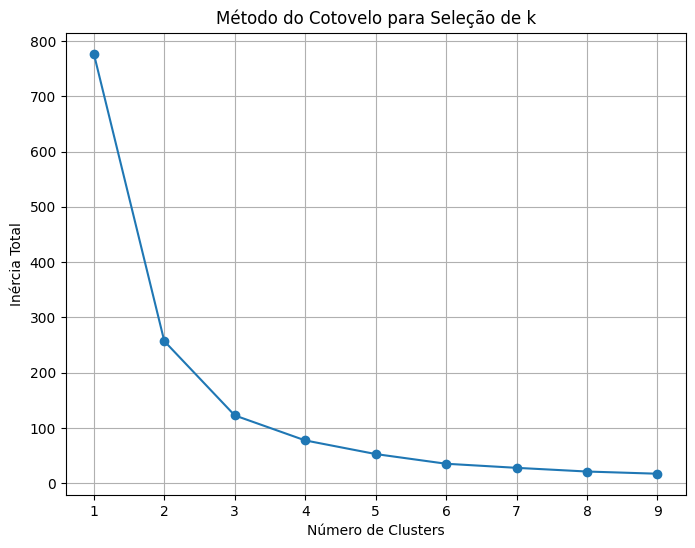

In [31]:
# Remover a coluna 'Private' e normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lista para armazenar inércias totais e por cluster
inertias_totais = []
inertias_por_cluster = []
num_clusters_range = range(1, 10)  # Testar de 1 a 9 clusters

# Calcular inércias para diferentes números de clusters
for k in num_clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    # Inércia total
    inertias_totais.append(kmeans.inertia_)
    
    # Calcular inércia por cluster
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inercia_cluster = []
    
    for cluster in range(k):
        # Selecionar pontos pertencentes ao cluster
        pontos_cluster = X_scaled[labels == cluster]
        if len(pontos_cluster) > 0:  # Verificar se o cluster não está vazio
            # Calcular a soma das distâncias quadradas ao centroide
            distancias = np.sum((pontos_cluster - centroids[cluster]) ** 2)
            inercia_cluster.append(distancias)
        else:
            inercia_cluster.append(0)  # Cluster vazio (raro, mas para segurança)
    
    inertias_por_cluster.append(inercia_cluster)

# Calcular variação percentual da inércia total entre k e k-1
variacoes_percentuais = []
for i in range(1, len(inertias_totais)):
    variacao = ((inertias_totais[i-1] - inertias_totais[i]) / inertias_totais[i-1]) * 100
    variacoes_percentuais.append(variacao)

print("Resultados da Inércia por Cluster e Variação Percentual:\n")
for k, inercia_total, inercia_cluster in zip(num_clusters_range, inertias_totais, inertias_por_cluster):
    print(f"Número de Clusters: {k}")
    print(f"Inércia Total: {inercia_total:.2f}")
    print(f"Inércias por Cluster: {[round(x, 2) for x in inercia_cluster]}")
    if k > 1:
        print(f"Variação Percentual (de {k-1} para {k} clusters): {variacoes_percentuais[k-2]:.2f}%")
    print("-" * 50)


plt.figure(figsize=(8, 6))
plt.plot(num_clusters_range, inertias_totais, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia Total')
plt.title('Método do Cotovelo para Seleção de k')
plt.grid(True)
plt.show()

In [32]:
for k in num_clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    if k > 1:  # Silhouette requer pelo menos 2 clusters
        score = silhouette_score(X_scaled, kmeans.labels_)
        print(f"Silhouette Score para k={k}: {score:.3f}")

Silhouette Score para k=2: 0.585
Silhouette Score para k=3: 0.558
Silhouette Score para k=4: 0.528
Silhouette Score para k=5: 0.524
Silhouette Score para k=6: 0.550
Silhouette Score para k=7: 0.540
Silhouette Score para k=8: 0.543
Silhouette Score para k=9: 0.540


Vemos que 3 cluster conseguem representar bem os resultados, mesmo que só haja duas classes (privada ou não privada). Logo, podemos aplicar o kmeans novamente e comparar com os resultados originais.

In [33]:
# Aplicar K-Means com k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
dados['Cluster'] = kmeans.labels_

# Analisar características dos clusters
cluster_summary = dados.groupby('Cluster').mean(numeric_only=True)
cluster_summary['Private_Prop'] = dados.groupby('Cluster')['Private'].apply(lambda x: (x == 'Yes').mean())
print("Resumo das Características por Cluster (k=3):")
print(cluster_summary)

Resumo das Características por Cluster (k=3):
                Apps       Accept      Enroll  Top10perc  Top25perc  \
Cluster                                                               
0        3134.092025  2166.300613  765.460123  27.776074  57.346626   
1        3784.870588  2192.388235  705.176471  37.847059  64.964706   
2        2374.131673  1742.672598  842.060498  21.081851  48.451957   

         F.Undergrad  P.Undergrad      Outstate   Room.Board       Books  \
Cluster                                                                    
0        3731.337423   832.392638  10751.447853  4441.947853  551.058282   
1        3013.905882   679.476471  14511.417647  5989.294118  582.152941   
2        4078.462633   988.241993   7617.391459  3272.395018  527.608541   

            Personal        PhD   Terminal  S.F.Ratio  perc.alumni  \
Cluster                                                              
0        1312.444785  73.634969  81.226994  14.217791    23.641104   
1      

Temos então o seguinte: 
- Cluster 0 = representa universidades privadas de elite, com alta seletividade, turmas menores, altas mensalidades e despesas por aluno, e fortes taxas de graduação.
- Cluster 1 = inclui principalmente universidades privadas menores e menos seletivas, mas também algumas públicas menores (menos recursos, já que tem o menos custo por aluno e custo por sala)
- Cluster 2 = representa principalmente universidades públicas grandes, com grande número de aplicações, matrículas e alunos de meio período, mensalidades mais baixas e turmas maiores.


In [34]:
# Comparar com rótulos verdadeiros
dados['True_Label'] = np.where(dados['Private'] == 'Yes', 1, 0)
confusion_matrix = pd.crosstab(dados['True_Label'], dados['Cluster'], rownames=['True_Label'], colnames=['Cluster'])
print("\nMatriz de Confusão (k=3):")
print(confusion_matrix)


Matriz de Confusão (k=3):
Cluster       0    1    2
True_Label               
0            86    8  118
1           240  162  163


Se colocarmos o cluster 0 e 1 como privadas, mesmo a 1 incluindo algumas faculdades públicas, a acurácia é de $86\%$, levemente melhor do que a anterior, que deu $83\%$. Mas, há limitações já que a baixa Silhouette Score (0.227) indica que os clusters não são altamente distintos, provavelmente devido a sobreposições nas features (ex.: Enroll' não separa perfeitamente públicas de privadas). O Cluster 1 é misto, o que reduz a pureza dos clusters em relação aos rótulos verdadeiros.

Cluster 1 contém uma mistura de privadas (301) e públicas (95). Para entender melhor, vamos analisar esse cluster

In [35]:
print("Universidades no Cluster 1:")
print(dados[dados['Cluster'] == 1][['Private'] + list(X.columns)].head(10))

Universidades no Cluster 1:
                        Private  Room.Board
Adelphi University          Yes        6450
Agnes Scott College         Yes        5450
Albertus Magnus College     Yes        5720
Alfred University           Yes        5406
Amherst College             Yes        5300
Assumption College          Yes        5920
Bard College                Yes        6206
Barnard College             Yes        8124
Barry University            Yes        5360
Beaver College              Yes        5400


O Cluster 1 agrupa principalmente privadas menores e menos seletivas, mas inclui públicas pequenas que compartilham características como baixo número de aplicações e matrículas. Isso explica a sobreposição com Cluster 0 (privadas de elite) e a dificuldade em separação pura.

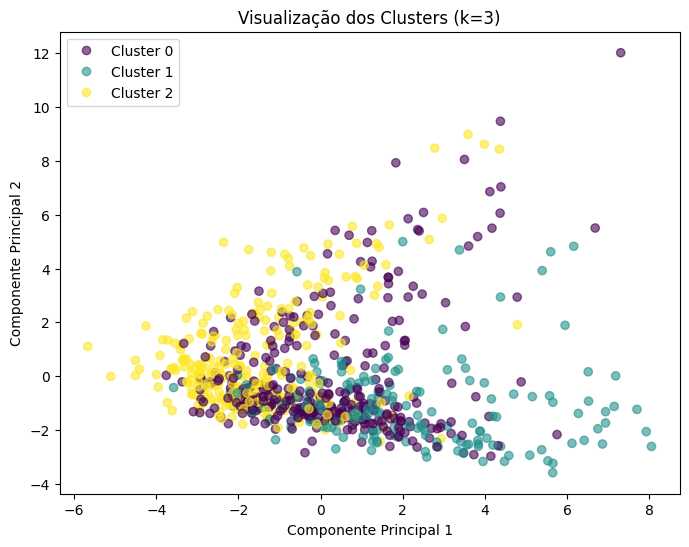

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(dados_scaled)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dados['Cluster'], cmap='viridis', alpha=0.6)
plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualização dos Clusters (k=3)')
plt.show()

A separação não é perfeita, com sobreposição entre Cluster 0 e Cluster 1, o que é consistente com o Silhouette Score baixo (0.227) e a mistura de públicas e privadas no Cluster 1 (conforme a matriz de confusão anterior).
Cluster 2 (amarelo) é o mais distinto, se alinhando com as públicas grandes, que têm características mais homogêneas (ex.: alto número de aplicações e matrículas).

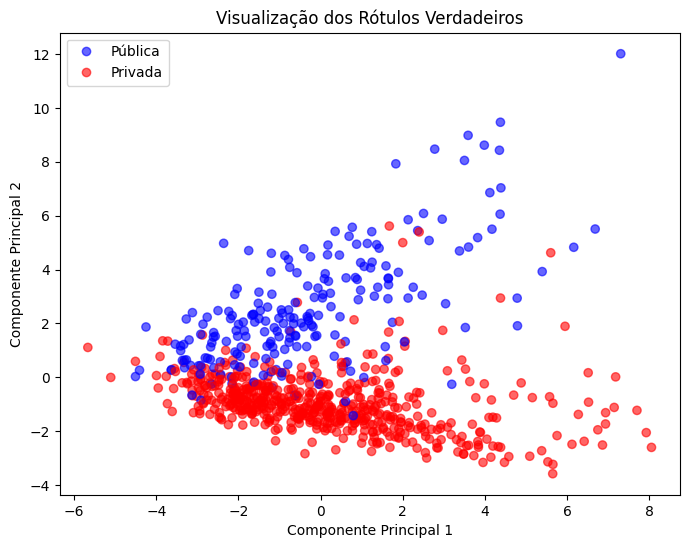

In [41]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dados['True_Label'], cmap='bwr', alpha=0.6)
plt.legend(handles=scatter.legend_elements()[0], labels=['Pública', 'Privada'])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualização dos Rótulos Verdadeiros')
plt.show()

É possível ver uma sobreposição significativa entre públicas e privadas, especialmente na região central (valores próximos de 0 em ambas as componentes principais). A sobreposição confirma que as features originais não separam perfeitamente públicas de privadas, o que explica a dificuldade do K-Means em alcançar clusters puros com $ k=2 $ ou $ k=3 $.

In [ ]:
from sklearn.metrics import adjusted_rand_score
print("Adjusted Rand Index (k=3):", adjusted_rand_score(dados['True_Label'], dados['Cluster']))

Adjusted Rand Index (k=3): 0.2090580468768935


Um ARI de $0.209 $ é moderado, sugerindo que o clustering com $ k=3 $ tem alguma correspondência com os rótulos verdadeiros (públicas vs. privadas), mas não é forte.
Comparado à acurácia ajustada ($~86\%$ com mapeamento), o ARI baixo reflete a sobreposição e a natureza não supervisionada do K-Means, que não foi otimizado para os rótulos verdadeiros.

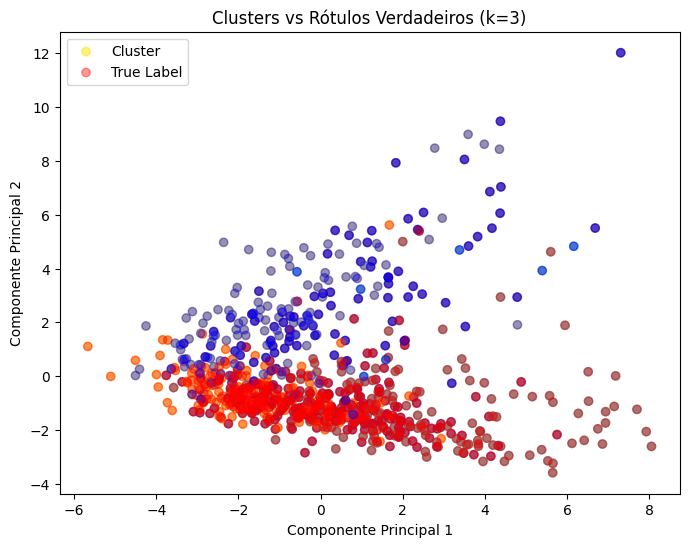

In [42]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dados['Cluster'], cmap='viridis', alpha=0.6, label='Cluster')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dados['True_Label'], cmap='bwr', alpha=0.4, label='True Label')
plt.legend()
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters vs Rótulos Verdadeiros (k=3)')
plt.show()

A visualização reforça que $ k=3 $ captura uma estrutura baseada em tamanho, custo e seletividade, mais do que uma divisão binária exata entre públicas e privadas.
A sobreposição entre Cluster 1 e os rótulos sugere que algumas públicas pequenas se assemelham a privadas menos seletivas, como indicado anteriormente.

In [43]:
dados['Acceptance_Rate'] = dados['Accept'] / dados['Apps']
X_new = dados.drop(['Private', 'Cluster'], axis=1)
X_new_scaled = scaler.fit_transform(X_new)
kmeans_new = KMeans(n_clusters=3, random_state=42)
kmeans_new.fit(X_new_scaled)
dados['Cluster_New'] = kmeans_new.labels_
print(dados.groupby('Cluster_New').mean(numeric_only=True))

                    Apps       Accept       Enroll  Top10perc  Top25perc  \
Cluster_New                                                                
0            1176.830882   904.294118   371.950980  18.941176  45.004902   
1            8096.625000  5491.673611  2234.909722  26.729167  59.159722   
2            3049.831111  1817.146667   588.693333  43.715556  73.213333   

              F.Undergrad  P.Undergrad      Outstate   Room.Board       Books  \
Cluster_New                                                                     
0             1607.210784   510.073529   8936.480392  4000.816176  534.068627   
1            11746.256944  2688.298611   7536.993056  3988.395833  581.020833   
2             2345.000000   308.186667  15026.617778  5240.604444  556.897778   

                Personal        PhD   Terminal  S.F.Ratio  perc.alumni  \
Cluster_New                                                              
0            1310.696078  62.328431  70.475490  14.547794    19.9

A adição de Acceptance_Rate melhorou a separação, com Cluster_New 2 alinhando-se melhor com privadas de elite (98.2% privadas) e Cluster_New 1 com públicas grandes (93.8% públicas). Cluster_New 0 ainda contém uma mistura, mas com menos públicas (17.9%) do que o Cluster 1 original (24%).
A pureza aumentou, como confirmado no código baixo.

In [44]:
def purity_score(y_true, y_pred):
    contingency_matrix = pd.crosstab(y_true, y_pred)
    return np.sum(np.max(contingency_matrix.values, axis=0)) / np.sum(contingency_matrix.values)
print("Pureza dos Clusters (k=3):", purity_score(dados['True_Label'], dados['Cluster']))

Pureza dos Clusters (k=3): 0.7271557271557272
